<a href="https://colab.research.google.com/github/niwanulgiffar/Machine-Learning-Project/blob/main/Perbandingan_Regresi_RF_GB_DT_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Perbandingan Akurasi Pemodelan Regresi Beberapa Algoritma***

In [ ]:
#import library 
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
###change directory ke folder drive tempat kalian simpan filenya
%cd "/content/drive/MyDrive/KampusMerdeka"

/content/drive/MyDrive/KampusMerdeka


In [ ]:
abalone = pd.read_csv(r'Abalone.csv') #read file di folder drive
abalone.head(5) #membaca 5 row teratas

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
abalone.sum().isnull()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
abalone.describe

<bound method NDFrame.describe of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1

In [ ]:
encoded_data = pd.get_dummies(abalone)
print(encoded_data.shape)

(4177, 11)


In [ ]:
encoded_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [ ]:


from sklearn.model_selection import train_test_split
training_set = encoded_data.iloc[:4099, :]
validation_set = encoded_data.iloc[4099:, :]

print(training_set.shape)
print(validation_set.shape)

(4099, 11)
(78, 11)


In [ ]:
# split data into training and testing sets

X = training_set[['Length','Height']]
y = training_set['Rings'].values.reshape(-1,1)

X_val = validation_set[['Length','Height']]
y_val = validation_set['Rings'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)





LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
#Test RMSE
lin_regression_pred = lin_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, lin_regression_pred, squared=False)
print(f'Nilai RMSE:{test_rmse}')


Nilai RMSE:2.5679099174951547


In [ ]:
#Validation RMSE
lin_reg_pred_val = lin_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, lin_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 1.566178378231162


#Random Forest

In [ ]:
#Regresi Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
parameters = {'n_estimators' : [int(x) for x in np.linspace(100,1000,10)]}
rf_regressor = GridSearchCV(rf, parameters, scoring='neg_mean_squared_error', cv=5)
rf_regressor.fit(X_train, y_train.ravel())

print(rf_regressor.best_params_)
print(-rf_regressor.best_score_)

In [ ]:
rf_reg = RandomForestRegressor(n_estimators = 300)
rf_reg.fit(X_train, y_train)

#Test RMSE
rf_reg_pred = rf_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, rf_reg_pred, squared=False)
print(f'Nilai RMSE:{test_rmse}')

<ipython-input-14-54c71f570861>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Nilai RMSE:2.682397027163601


In [ ]:
#Validation RMSE
rf_reg_pred_val = rf_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, rf_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 2.1732493076890362


#Decision Tree

In [ ]:
#Import Decision Tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV

In [ ]:

dt = DecisionTreeRegressor()
#max_depth mengontrol kedalaman maksimum dari decision tree yang akan dibangun
#min_samples_split menentukan jumlah minimum sampel yang diperlukan untuk membagi sebuah node dalam decision tree.
parameters = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
dt_regressor = GridSearchCV(dt, parameters, scoring='neg_mean_squared_error', cv=5)
dt_regressor.fit(X_train, y_train.ravel())

print(dt_regressor.best_params_)
print(-dt_regressor.best_score_)

{'max_depth': 5, 'min_samples_split': 5}
6.7201871713172725


In [ ]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

#Test RMSE
dt_reg_pred = dt_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, dt_reg_pred, squared=False)
print(f'Nilai RMSE:{test_rmse}')

Nilai RMSE:2.843446840943459


In [ ]:
#Validation RMSE
rf_reg_pred_val = rf_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, rf_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 2.1688414146685275


#Gradien Boosting

In [ ]:
#Import Package
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


In [ ]:
gb_reg = GradientBoostingRegressor()

parameters = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
gb_regressor = GridSearchCV(gb_reg, parameters, scoring='neg_mean_squared_error', cv=5)
gb_regressor.fit(X_train, y_train.ravel())

print(gb_regressor.best_params_)
print(-gb_regressor.best_score_)

{'max_depth': 3, 'min_samples_split': 5}
6.652329743045243


In [ ]:
gb_reg = DecisionTreeRegressor()
gb_reg.fit(X_train, y_train)

#Test RMSE
gb_reg_pred = gb_reg.predict(X_test)
test_rmse = mean_squared_error(y_test, gb_reg_pred, squared=False)
print(f'Nilai RMSE:{test_rmse}')

Nilai RMSE:2.839082205440634


In [ ]:
#Validation RMSE
gb_reg_pred_val = gb_reg.predict(X_val)
val_rmse = mean_squared_error(y_val, gb_reg_pred_val, squared=False)
print(f'Validation RMSE: {val_rmse}')

Validation RMSE: 2.480683499836481


#Neural Nerwork

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Neural Network
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

# Mengkompilasi model
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluasi model pada data uji
y_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Nilai RMSE: {test_rmse}')

Epoch 1/100
103/103 [==============================] - 1s 2ms/step - loss: 107.8923
Epoch 2/100
103/103 [==============================] - 0s 2ms/step - loss: 96.5618
Epoch 3/100
103/103 [==============================] - 0s 2ms/step - loss: 86.1856
Epoch 4/100
103/103 [==============================] - 0s 2ms/step - loss: 75.0518
Epoch 5/100
103/103 [==============================] - 0s 2ms/step - loss: 63.1456
Epoch 6/100
103/103 [==============================] - 0s 2ms/step - loss: 51.2383
Epoch 7/100
103/103 [==============================] - 0s 2ms/step - loss: 40.1494
Epoch 8/100
103/103 [==============================] - 0s 2ms/step - loss: 30.5446
Epoch 9/100
103/103 [==============================] - 0s 1ms/step - loss: 22.8107
Epoch 10/100
103/103 [==============================] - 0s 2ms/step - loss: 17.0493
Epoch 11/100
103/103 [==============================] - 0s 2ms/step - loss: 13.0919
Epoch 12/100
103/103 [==============================] - 0s 2ms/step - loss: 10.6174


In [ ]:
from sklearn.metrics import mean_squared_error

# Menggunakan model yang sudah dilatih sebelumnya
y_pred_val = model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f'Validation RMSE: {val_rmse}')

3/3 [==============================] - 0s 3ms/step
Validation RMSE: 1.6322697863864346


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisi input layer
inputs = Input(shape=(X_train.shape[1],))

# Hidden layer
hidden1 = Dense(10, activation='relu')(inputs)

# Output layer
outputs = Dense(1, activation='linear')(hidden1)

# Membangun model
model = Model(inputs=inputs, outputs=outputs)

# Mengkompilasi model
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluasi model pada data uji
y_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Nilai RMSE: {test_rmse}')

Epoch 1/100
103/103 [==============================] - 1s 4ms/step - loss: 105.4096
Epoch 2/100
103/103 [==============================] - 0s 3ms/step - loss: 93.3408
Epoch 3/100
103/103 [==============================] - 0s 3ms/step - loss: 78.2105
Epoch 4/100
103/103 [==============================] - 0s 3ms/step - loss: 60.8901
Epoch 5/100
103/103 [==============================] - 0s 3ms/step - loss: 43.3719
Epoch 6/100
103/103 [==============================] - 1s 5ms/step - loss: 28.0402
Epoch 7/100
103/103 [==============================] - 0s 3ms/step - loss: 17.2092
Epoch 8/100
103/103 [==============================] - 0s 1ms/step - loss: 11.3293
Epoch 9/100
103/103 [==============================] - 0s 2ms/step - loss: 8.9003
Epoch 10/100
103/103 [==============================] - 0s 2ms/step - loss: 8.1421
Epoch 11/100
103/103 [==============================] - 0s 2ms/step - loss: 7.9612
Epoch 12/100
103/103 [==============================] - 0s 1ms/step - loss: 7.9163
Epoc

#KNN

In [ ]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 3.1328316498563185
RMSE value for k=  2 is: 3.2296265735960943
RMSE value for k=  3 is: 3.2014563081861565
RMSE value for k=  4 is: 3.2581745225681504
RMSE value for k=  5 is: 3.2810319613967973
RMSE value for k=  6 is: 3.3390195403014493
RMSE value for k=  7 is: 3.4244385659965806
RMSE value for k=  8 is: 3.432532441713353
RMSE value for k=  9 is: 3.45718859276929
RMSE value for k=  10 is: 3.4771413826765736
RMSE value for k=  11 is: 3.4867387784303947
RMSE value for k=  12 is: 3.5241160070911848
RMSE value for k=  13 is: 3.5163371468465554
RMSE value for k=  14 is: 3.5227006840643185
RMSE value for k=  15 is: 3.510557055526715
RMSE value for k=  16 is: 3.554051010089342
RMSE value for k=  17 is: 3.5760217380505694
RMSE value for k=  18 is: 3.6210962637244664
RMSE value for k=  19 is: 3.679321898731362
RMSE value for k=  20 is: 3.687075316594971


<Axes: >

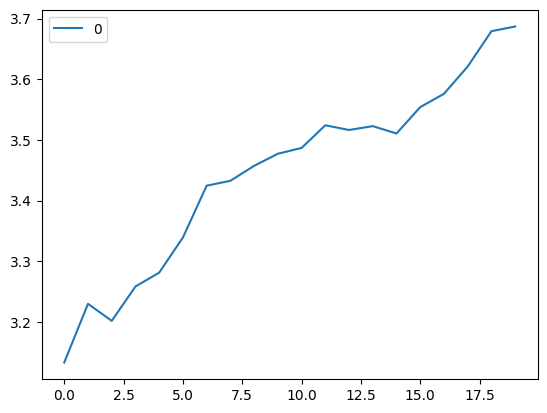

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()